In [1]:
%matplotlib inline

import random

import shapely.geometry as geom
import shapely.affinity as affine
import shapely.ops as ops
import shapely.wkt as wkt
import geopandas as gpd
import numpy as np

from tile_units import TileUnit
from tile_map import Tiling
from weave_units import WeaveUnit
from weave_grids import WeaveGrid
import tiling_utils

In [2]:
ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

<AxesSubplot:>

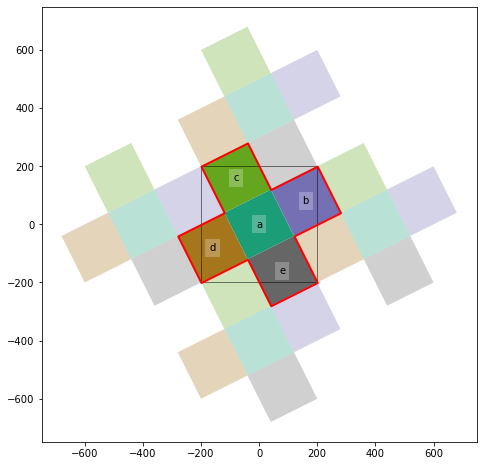

In [14]:
t = TileUnit(tiling_type = "square-colouring", n = 5, 
             spacing = 400, crs = ak.crs)
t.plot(r = 1)

In [15]:
rot = np.degrees(np.arctan2(1, 2))

In [22]:
tiling = Tiling(t, ak, id_var = "DZ2018", tile_margin = 7.5)
tmap = tiling.get_tiled_map(rotation = 0, prioritise_tiles = True)

tmap.variables = [x for x in ak.columns if "Rank" in x]
tmap.colourmaps = dict(zip(tmap.variables,
                           ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG", "PRGn", "PuOr")))

Only a list of variables specified, assigning to available element_ids.


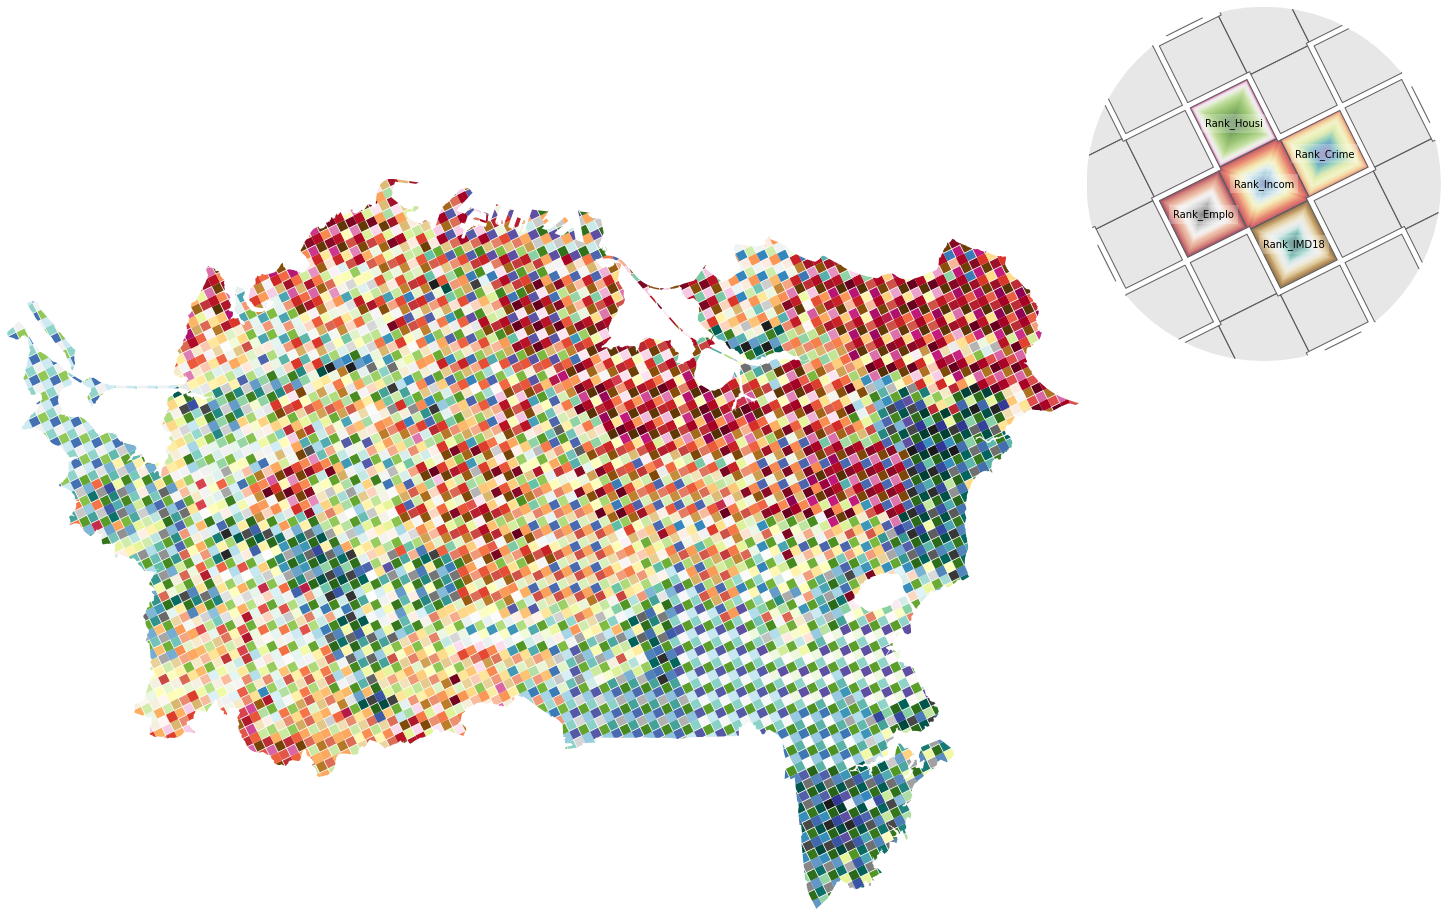

In [23]:
fig = tmap.render(use_ellipse = True, ellipse_magnification = 1.2)

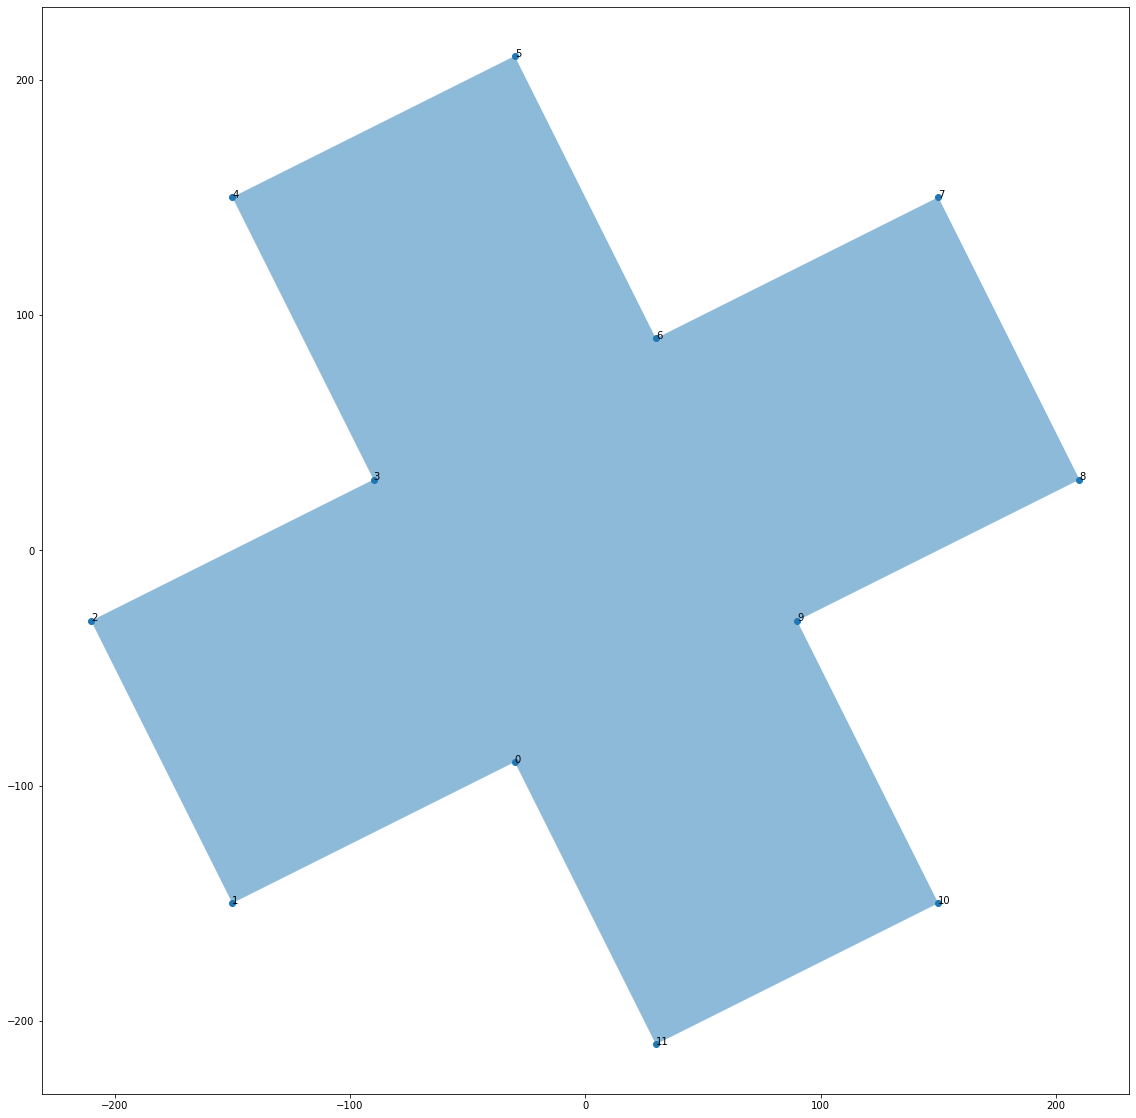

In [6]:
pts = gpd.GeoSeries(
    [geom.Point(p) 
     for p in t.regularised_tile.geometry[0].exterior.coords][:-1])

ax = t.regularised_tile.plot(figsize = (20, 20), alpha = 0.5)
pts.plot(ax = ax)
for i, p in enumerate(pts):
    ax.annotate(i, (p.x, p.y))